In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# making plots look good
import matplotlib

plt.rcParams['text.usetex'] = False
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.serif'] = 'Arial'
matplotlib.rcParams.update({'font.size': 14, 'legend.handleheight':1, 'hatch.linewidth': 1.0,
                           'lines.markersize':4, 'lines.linewidth':1.5,'xtick.labelsize':14})

In [3]:
class_labels = pd.read_csv("../audioset_metadata/class_labels_indices.csv", index_col="index")
map_id_label = {mid: name for  _, (mid, name) in class_labels.iterrows() }

In [4]:
unbalanced = pd.read_csv("../audioset_metadata/unbalanced_train_segments.csv", quoting=2, sep=',\s+', skiprows=3, names=['YTID', 'start', 'end', 'labels'], engine='python')
# unbalanced = unbalanced[:100]
unbalanced.head()

,YTID,start,end,labels
0,---1_cCGK4M,0.0,10.0,"""/m/01g50p,/m/0284vy3,/m/06d_3,/m/07jdr,/m/07r..."
1,---2_BBVHAA,30.0,40.0,"""/m/09x0r"""
2,---B_v8ZoBY,30.0,40.0,"""/m/04rlf"""
3,---EDNidJUA,30.0,40.0,"""/m/02qldy,/m/02zsn,/m/05zppz,/m/09x0r"""
4,---N4cFAE1A,21.0,31.0,"""/m/04rlf,/m/09x0r"""


In [5]:
# process unbalanced to remove multiple labels
unbalanced.labels = unbalanced.labels.map(lambda x: x.replace('"',"").split(","))
unbalanced["num_labels"] = unbalanced.labels.apply(len)
unbalanced = unbalanced[unbalanced["num_labels"] == 1]
unbalanced.labels = unbalanced.labels.map(lambda x: x[0])
unbalanced.labels = unbalanced.labels.map(map_id_label)
unbalanced["duration"] = unbalanced.end - unbalanced.start
duration_by_class_all = unbalanced.groupby("labels", as_index=False).agg({"duration": sum}).sort_values("duration", ascending=False)

In [6]:
duration_by_class = duration_by_class_all[:60]
duration_by_class['duration'] = duration_by_class['duration'] / 3600
duration_by_class.head()

/tmp/ipykernel_6298/2447633686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_by_class['duration'] = duration_by_class['duration'] / 3600


,labels,duration
412,Speech,1214.717500
287,Music,785.244722
480,Vehicle,31.396944
250,"Inside, small room",14.679444
303,"Outside, rural or natural",10.165833


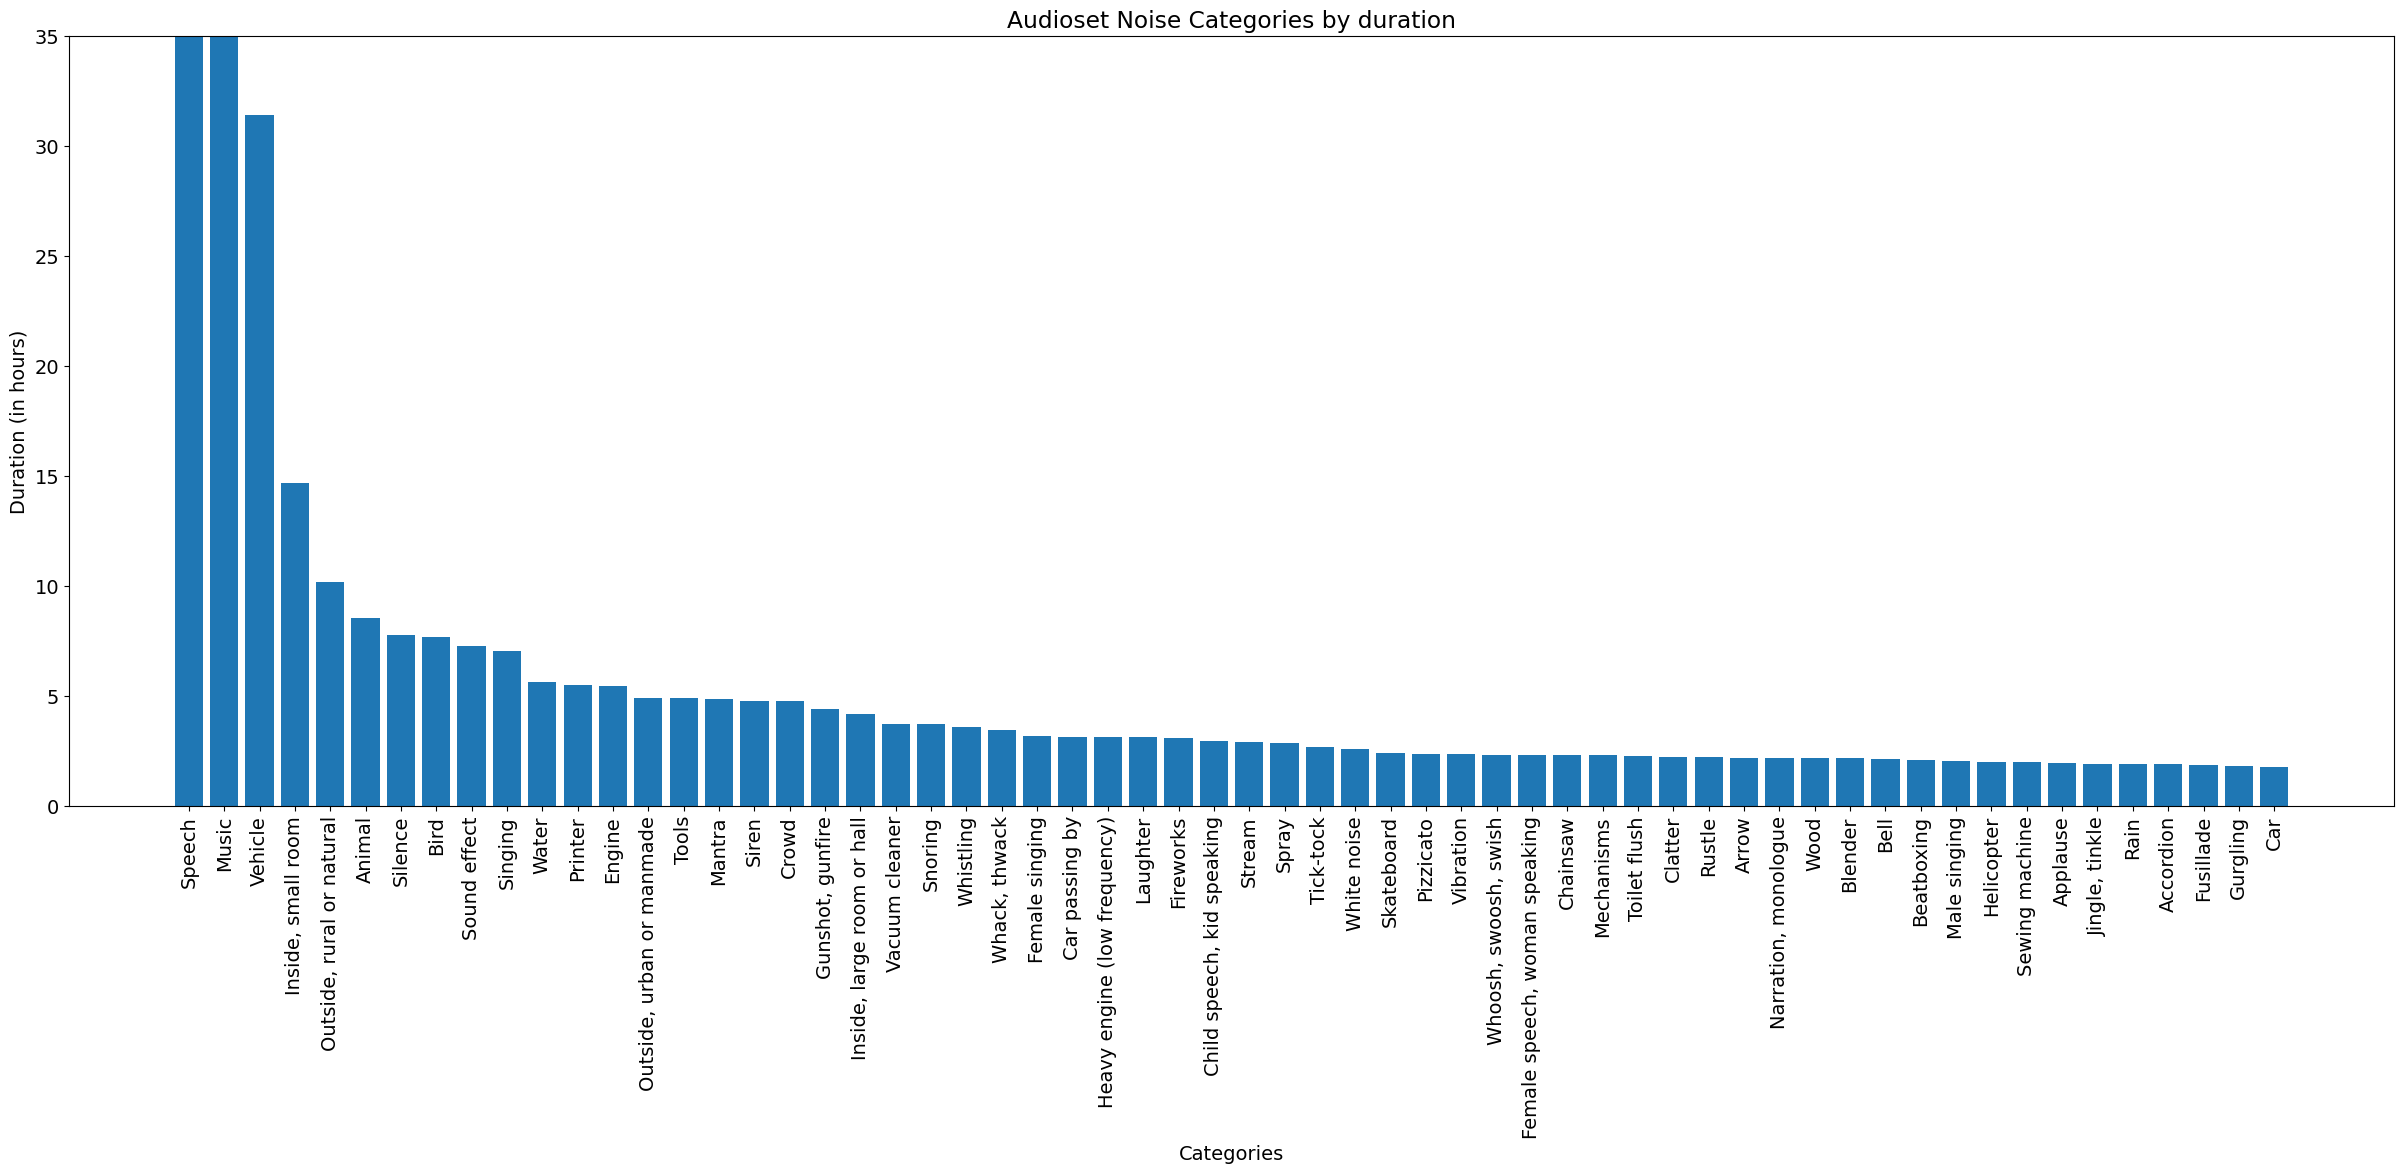

In [7]:
# Create a figure with custom size
fig, ax = plt.subplots(figsize=(30, 10))

# Plotting
ax.bar(duration_by_class["labels"], duration_by_class["duration"])

# Adding labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Duration (in hours)')
ax.set_title('Audioset Noise Categories by duration')

ax.set_ylim(0, 35) 

# Rotating x-axis labels
plt.xticks(rotation=90)

plt.savefig('audioset_categories.png', bbox_inches='tight')

# Displaying the plot
plt.show()

In [8]:
wanted_labels =[
    "Vehicle",
    "Car",
    "Subway, metro, underground",
    "Train",
    "Outside, rural or natural",
    "White noise",
    "Bark",
    "Purr",
    "Meow",
    "Howl",
    "Moo",
    "Rain",
    "Vacuum cleaner",
    "Child speech, kid speaking",
    "Baby cry, infant cry",
    "Crying, sobbing",
    "Water tap, faucet",
    "Walk, footsteps",
    "Knock",
    "Microwave oven",
    "Bathtub (filling or washing)",
    "Toilet flush",
    "Air conditioning",
    "Animal",
    "Water"
]

In [9]:
wanted_labels_duration = duration_by_class_all[duration_by_class_all["labels"].map(lambda x : x in wanted_labels)]
wanted_labels_duration["duration"] = wanted_labels_duration["duration"] / 60
wanted_labels_duration

/tmp/ipykernel_6298/2722092445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wanted_labels_duration["duration"] = wanted_labels_duration["duration"] / 60


,labels,duration
480,Vehicle,1883.816667
303,"Outside, rural or natural",609.950000
15,Animal,512.766667
489,Water,336.916667
479,Vacuum cleaner,222.716667
85,"Child speech, kid speaking",177.866667
504,White noise,153.916667
458,Toilet flush,136.500000
335,Rain,113.550000
67,Car,104.616667


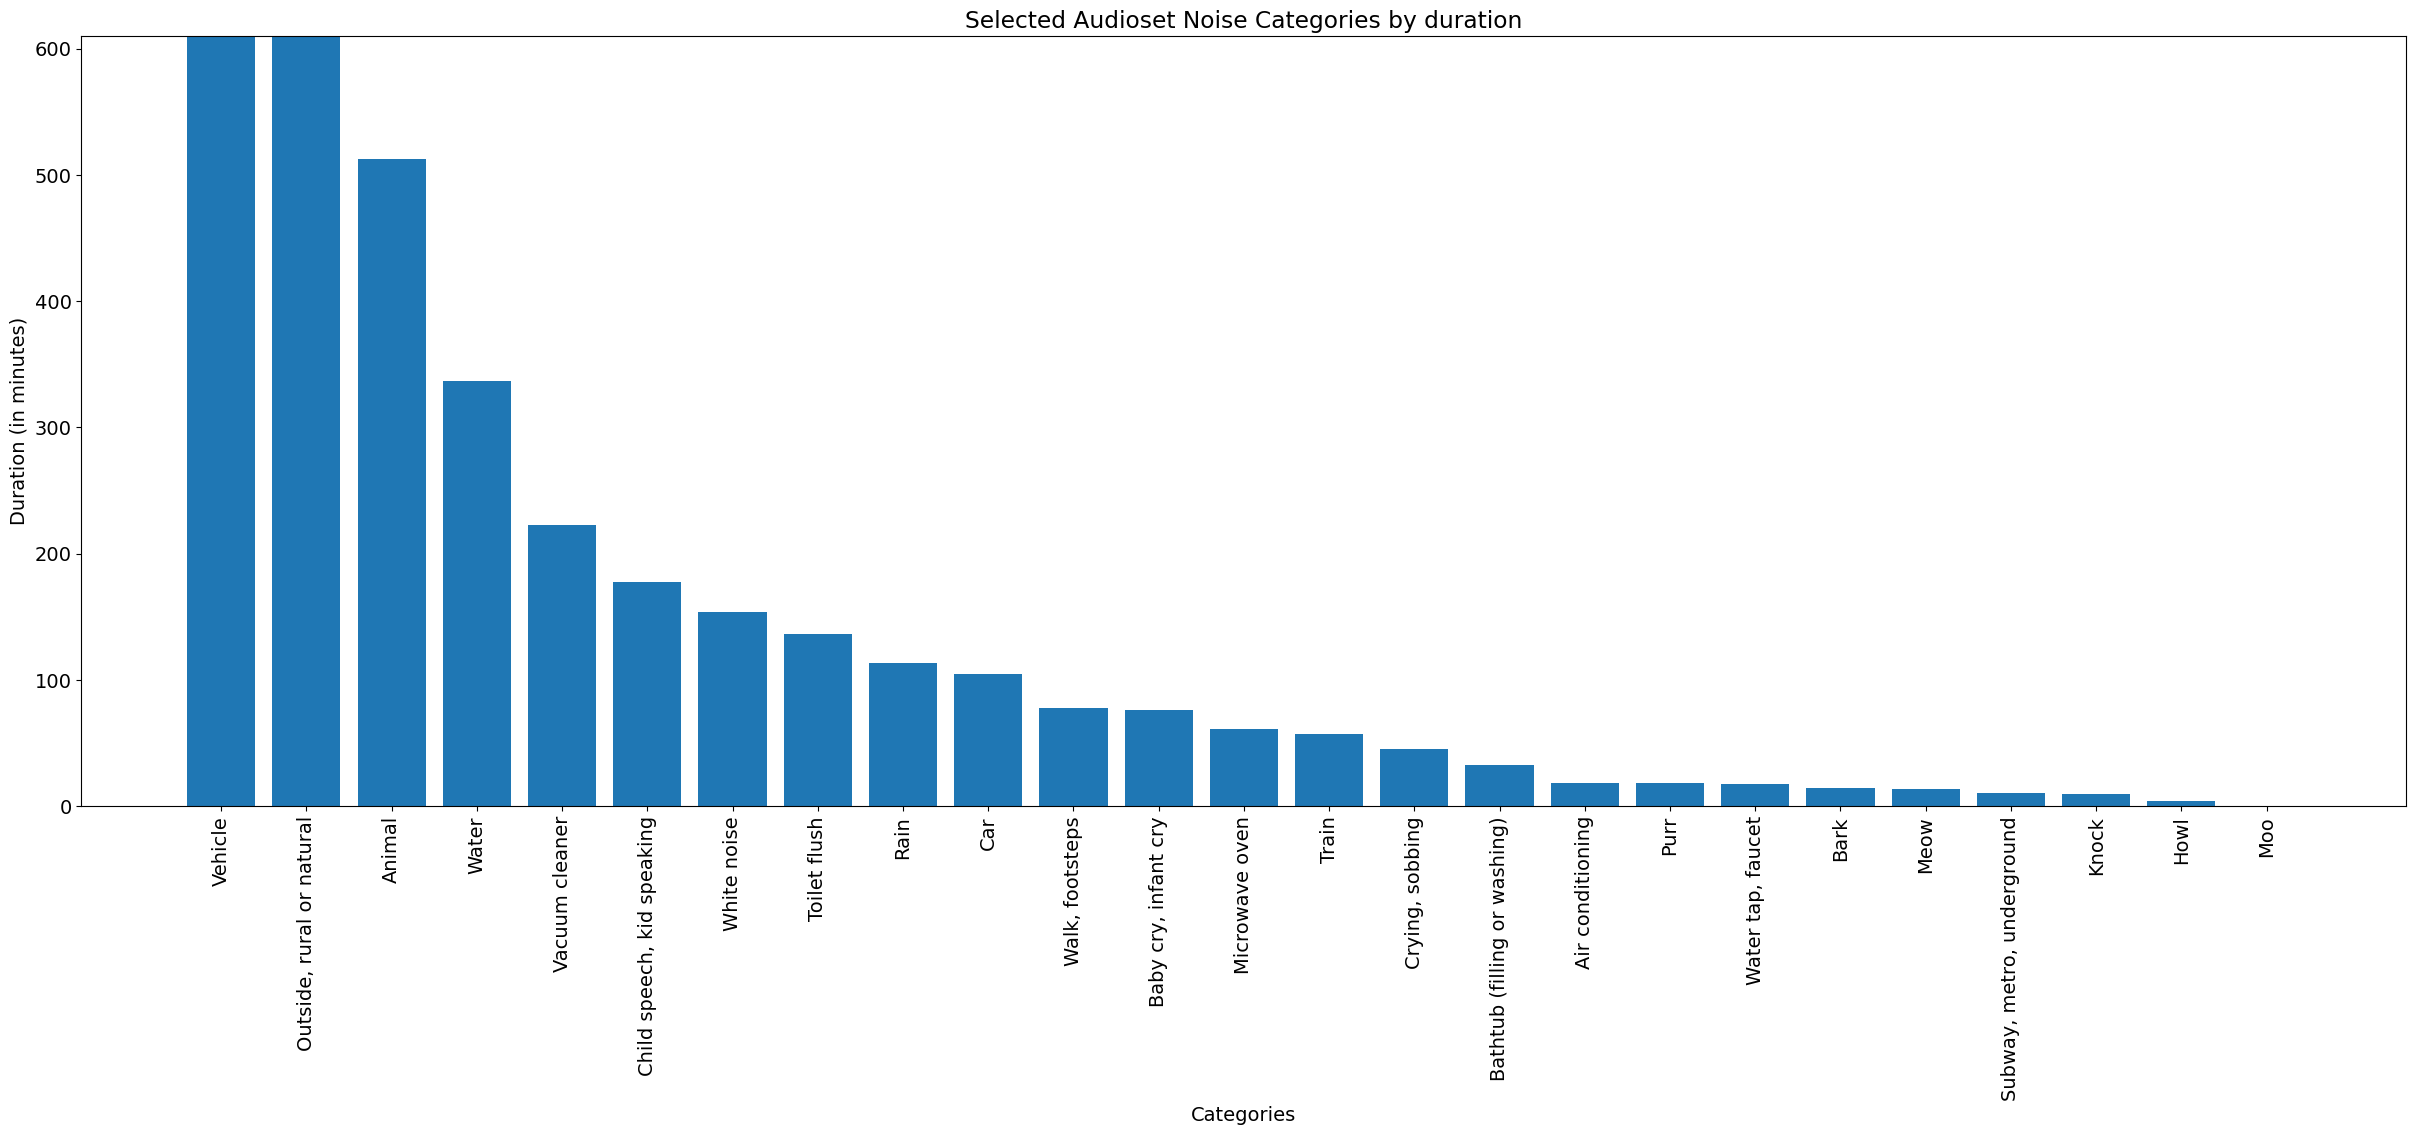

In [10]:
# Create a figure with custom size
fig, ax = plt.subplots(figsize=(30, 10))

# Plotting
ax.bar(wanted_labels_duration["labels"], wanted_labels_duration["duration"])

# Adding labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Duration (in minutes)')
ax.set_title('Selected Audioset Noise Categories by duration')

ax.set_ylim(0, 610) 

# Rotating x-axis labels
plt.xticks(rotation=90)

plt.savefig('selected_audioset_categories.png', bbox_inches='tight')

# Displaying the plot
plt.show()